# Implementation 1

We use a Node class and recursive algorithms for insert and depth.

In [39]:
# how deep do binary search trees get on average

import math

math.factorial(12) # = 479001600

class Node():
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def insert(n, val):
    if val > n.val:
        if n.right:
            insert(n.right, val)
        else:
            n.right = Node(val)
    else:
        if n.left:
            insert(n.left, val)
        else:
            n.left = Node(val)
            

def depth(n, d=0):
    ld, rd = d, d
    if n.left:
        ld = depth(n.left, d+1)
    if n.right:
        rd = depth(n.right, d+1)
    return max(ld, rd)

def node_to_string(n):
    if n == None:
        return ""
    return f"Node({n.val},{node_to_string(n.left)},{node_to_string(n.right)})"


b = Node(1)
assert depth(b) == 0

insert(b, 2)
assert depth(b) == 1

insert(b, 1.5)
# assert b.tree == [1,0,2,0,0,1.5]
assert depth(b) == 2

insert(b, 3)
# assert b.tree == [1,0,2,0,0,1.5,3]
assert depth(b) == 2

insert(b, 4)
# assert b.tree == [1,0,2,0,0,1.5,3,0,0,0,0,0,0,0,4]
assert depth(b) == 3

assert node_to_string(b) == "Node(1,,Node(2,Node(1.5,,),Node(3,,Node(4,,))))"

We define a function to record the distribution of depths for a list of a given size

In [ ]:
from itertools import permutations
from collections import Counter


def get_depths_distribution(num_nodes):
    c = Counter()

    for p in permutations(range(1, num_nodes+1)):
        n = Node(p[0])
        for i in p[1:]:
            insert(n,i)
        d = depth(n)
        c[d] += 1
    return c


And we benchmark Implementation 1

In [ ]:
# Benchmark
for i in range(3,11):
    s = time.perf_counter()
    c = get_depths_distribution(i)
    e = time.perf_counter()
    print(c)
    print(i, e-s)

'''
Expected results:

Counter({2: 4, 1: 2})
3 4.9700000090524554e-05
Counter({2: 16, 3: 8})
4 0.00016670000331941992
Counter({3: 64, 2: 40, 4: 16})
5 0.001103500006138347
Counter({3: 400, 4: 208, 2: 80, 5: 32})
6 0.020237899996573105
Counter({3: 2240, 4: 2048, 5: 608, 2: 80, 6: 64})
7 0.08806690000346862
Counter({4: 18816, 3: 11360, 5: 8352, 6: 1664, 7: 128})
8 0.632320200005779
Counter({4: 168768, 5: 104448, 3: 55040, 6: 30016, 7: 4352, 8: 256})
9 7.130554100003792
Counter({4: 1508032, 5: 1277568, 6: 479040, 3: 253440, 7: 99200, 8: 11008, 9: 512})
10 80.77484329999425
'''

# Implementation 2

We define a second implementation. It uses an array to store the binary tree. In worst cases the array is very sparse and 0(2^n) but the depth function is O(1). It turns out the benchmark results for this method are better.

In [27]:
# how deep do binary search trees get on average

import math

math.factorial(12) # = 479001600

class Node():
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class BinaryTree():
    def __init__(self, values):
        '''
        values must be > 0
        '''
        self.tree = [0]
        for i in values:
            self.insert(i)
            
    def insert(self, val):
        i = 0
        while self.tree[i] != 0:
            if val < self.tree[i]:
                i = (2*i)+1
            else:
                i = (2*i)+2
            if i >= len(self.tree):
                self.tree.extend([0]*(i-len(self.tree)+1))
        self.tree[i] = val
    
    def depth(self):
        return math.floor(math.log((2-1)*len(self.tree), 2))



We define a function to record the distribution of depths for a list of a given size

In [41]:
from itertools import permutations
from collections import Counter
import time

def get_depth_distribution2(num_nodes):
    c = Counter()
    for p in permutations(range(1,num_nodes+1)):
        b = BinaryTree(p)
        c[b.depth()] += 1
    return c


We benchmark Implementation 2.

In [ ]:
for i in range(3,11):
    s = time.perf_counter()
    c = get_depth_distribution2(i)
    e = time.perf_counter()
    print(c)
    print(i, e-s)

"""
Counter({2: 4, 1: 2})
3 9.630000567995012e-05
Counter({2: 16, 3: 8})
4 0.00034679999225772917
Counter({3: 64, 2: 40, 4: 16})
5 0.0026898999931290746
Counter({3: 400, 4: 208, 2: 80, 5: 32})
6 0.01324929999827873
Counter({3: 2240, 4: 2048, 5: 608, 2: 80, 6: 64})
7 0.1091323000000557
Counter({4: 18816, 3: 11360, 5: 8352, 6: 1664, 7: 128})
8 0.6053467000019737
Counter({4: 168768, 5: 104448, 3: 55040, 6: 30016, 7: 4352, 8: 256})
9 6.487845499999821
Counter({4: 1508032, 5: 1277568, 6: 479040, 3: 253440, 7: 99200, 8: 11008, 9: 512})
10 69.87349779999931
Counter({5: 15727232, 4: 13501312, 6: 7345536, 7: 1950080, 3: 1056000, 8: 308480, 9: 27136, 10: 1024})
11 975.0813543999975

"""

# Plotting Distributions

We define a helper function to plot the distributions `plot_function`.

In [3]:
import matplotlib.pyplot as plt
import time


def plot_function(xs, ys, title="", xlabel="", ylabel=""):
    fig, ax = plt.subplots()
    ax.plot(
        xs, 
        ys)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


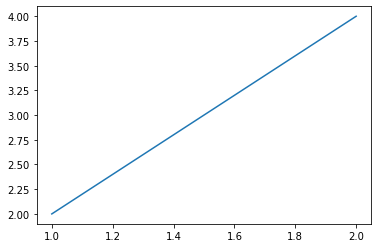

6.049999501556158e-05


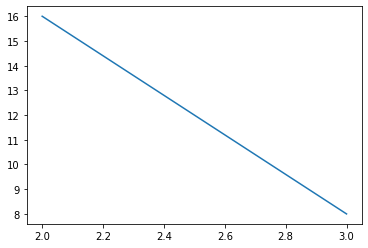

0.0001672000071266666


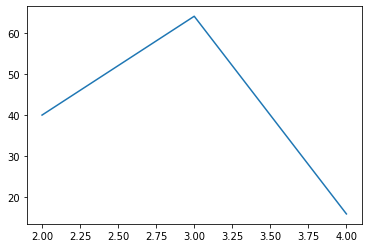

0.001710199998342432


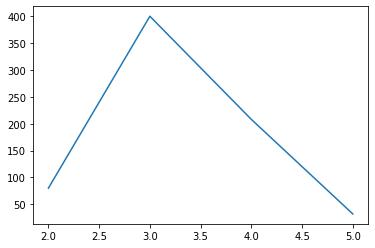

0.010570800004643388


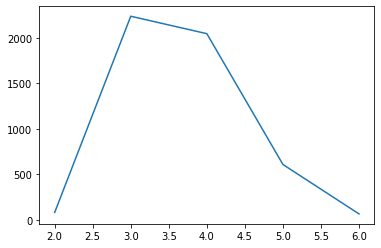

0.0797071999986656


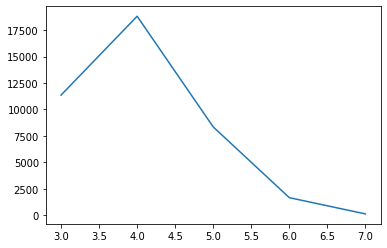

0.7072932000010042


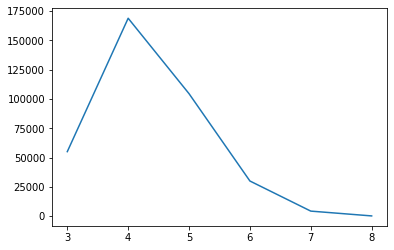

7.098639200004982


In [26]:
for i in range(3,10):
    s = time.perf_counter()
    c = get_depths_distribution2(i)
    e = time.perf_counter()
    plot_function(c.keys(), c.values())
    print(e-s)

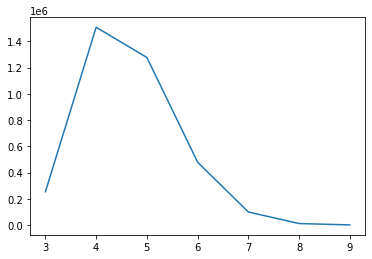

In [40]:
# we use the precalculated Counter for string of size 10 to avoid the long recalculation
c = Counter({4: 1508032, 5: 1277568, 6: 479040, 3: 253440, 7: 99200, 8: 11008, 9: 512})
c = [(k,v) for k,v in c.items()]
c.sort()
plot_function([k for k,v in c], [v for k,v in c])

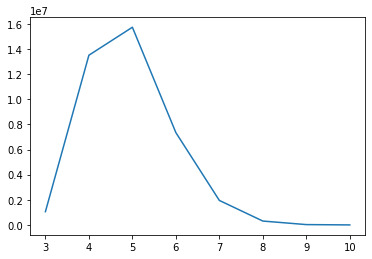

In [38]:
# we use the precalculated Counter for string of size 11 to avoid the long recalculation
c = Counter({5: 15727232, 4: 13501312, 6: 7345536, 7: 1950080, 3: 1056000, 8: 308480, 9: 27136, 10: 1024})
c = [(k,v) for k,v in c.items()]
c.sort()
plot_function([k for k,v in c], [v for k,v in c])

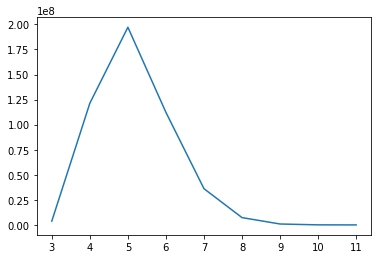

In [4]:
# we use the precalculated Counter for string of size 12 to avoid the long recalculation

c = Counter({5: 197163648, 4: 121362560, 6: 112255360, 7: 36141952, 8: 7293440, 3: 3801600, 9: 915456, 10: 65536, 11: 2048})
c = [(k,v) for k,v in c.items()]
c.sort()
plot_function([k for k,v in c], [v for k,v in c])